# 📊 Three Generations Seeking Romance: Regression and Classification Analysis

## 1. Introduction

- **Topic**: Online dating apps assist users in finding romantic relationships while enabling the prediction of age and generation by analyzing user profiles. This study aims to predict age and generation based on these profiles.
- **Dataset**: The analysis will use anonymized data from over 60,000 users from OkCupid to predict age and generation. Machine learning techniques will be employed to forecast user age and generation.

## 2. Objectives

- **Age Prediction (Regression)**: Predict the age of users based on profile data.
- **Generation Prediction (Classification)**: Determine which generation users belong to (Millennial, Gen X, Boomer) using their profile data.

## 3. Methodology

### For Age Prediction (Regression):

- **Model Selection**: Regression models such as Gradient Boosting and KNeighborsRegressor can be used.
- **Evaluation Metrics**: Model performance is evaluated using metrics like R^2 score, RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error).
- **Scaling**: Scaling of data is crucial to enhance model performance.

### For Generation Prediction (Classification):

- **Model Selection**: Classification models such as KNeighborsClassifier and Deep Learning models can be utilized.
- **Evaluation Metrics**: Model performance is assessed using accuracy, precision, recall, F1 score, and confusion matrix.
- **Data Processing**: Conversion of categorical data to numerical values is necessary for efficient model operation.

## 4. Results and Evaluation

- **Age Prediction Results**: The prediction results of the models are compared. The success of the model is assessed using R^2 score, RMSE, and MAE. For example, differences between results from Gradient Boosting and KNeighborsRegressor are analyzed.

- **Generation Prediction Results**: The accuracy and other metrics of the classification model are evaluated. The performance of KNeighborsClassifier and Deep Learning models is compared.

## 5. Visualization

- **Age Distribution**: Relationships between predicted and actual age values are visualized using scatter plots.
- **Confusion Matrix**: The performance of generation predictions is visualized using a confusion matrix.

## 6. Conclusion and Recommendations

- **Results**: The performance of models is analyzed to determine which model provides better results. The success of regression models for age prediction and classification models for generation prediction is evaluated.

🎯 **Future Recommendations**: To improve model performance, additional data collection, feature engineering, and hyperparameter optimization can be considered.



In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# Tüm sütunları görüntüle
pd.set_option('display.max_columns', None)
# Tüm satırları görüntüle 
pd.set_option('display.max_rows', None)

df=pd.read_csv('profiles.csv')

In [2]:
df.head(3)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


In [3]:
df.shape

(60552, 31)

### given to us 
This is a  Regression & Classification project

A DATA SCIENCE APPROACH TO PROFILING ONLINE DATERS ACCORDING TO AGE & GENERATION
1 - Can your dating profile predict your age?

2 - Can your dating profile predict the generation you belong to?

(Millennial, Gen X-er, or Boomers)
Using a dataset of almost 60,000 anonymized entries from the dating platform OKCupid, You will explore the above questions using supervised machine learning techniques. You will examine different aspects or features of user profiles and see which ones you will integrate into your models to achieve the most satisfactory scores. You will use regression techniques to tackle the first question and classification models to address the second.
By exploring the “last_online” feature’s min and max, the OKCupid dataset could be inferred to be dated around 2011 or 2012. At the time, a “Millennial” would be aged from 18 to 32, a “Gen X-er” 33 to 47, and “Boomers” from 48 to 70 years old.


<img src='https://media.licdn.com/dms/image/C5612AQFm-YEFrb3Apw/article-cover_image-shrink_720_1280/0/1640249633445?e=2147483647&v=beta&t=rj4Cr6gjZ4QRKM0kxrrI-vQpKNja1jFnAkcGq-LnA_I'>

## Shortly
ONLINE RANDEVU SAHIPLERININ YAŞ VE KUŞAKLARINA GÖRE PROFILINI ÇIKARMAYA YÖNELIK BIR VERI BILIMI YAKLAŞIMI

#1 - Arkadaşlık profiliniz yaşınızı tahmin edebilir mi?

#2 - Arkadaşlık profiliniz ait olduğunuz nesli tahmin edebilir mi? (Millennial, X-er veya Boomers)

Arkadaşlık platformu OKCupid'den yaklaşık 60.000 anonimleştirilmiş girişten oluşan bir veri kümesi kullanarak, denetimli makine öğrenimi tekniklerini kullanarak yukarıdaki soruları keşfedeceksiniz. Kullanıcı profillerinin farklı yönlerini veya özelliklerini inceleyecek ve en tatmin edici puanları elde etmek için hangilerini modellerinize entegre edeceğinizi göreceksiniz. İlk soruyu ele almak için regresyon tekniklerini ve ikincisini ele almak için sınıflandırma modellerini kullanacaksınız.



# EDA

In [4]:
df.isnull().sum()

age            51038
body_type      51886
diet           54791
drinks         51540
drugs          53337
education      52093
essay0         51885
essay1         52205
essay2         52503
essay3         52862
essay4         52673
essay5         52738
essay6         53200
essay7         52999
essay8         54191
essay9         52998
ethnicity      51987
height         51038
income         51038
job            52369
last_online    51038
location       51038
offspring      56666
orientation    51038
pets           54200
religion       54291
sex            51038
sign           52776
smokes         51956
speaks         51044
status         51038
dtype: int64

###  Boş olan hedef değikenlere göre axis= 0  gereksiz olan  verilere göre axis =1ile veriler atılacak


In [5]:
# Age değerleri boş olan satırı silme 
df = df.dropna(subset=['age'], axis=0)
df.shape

(9514, 31)

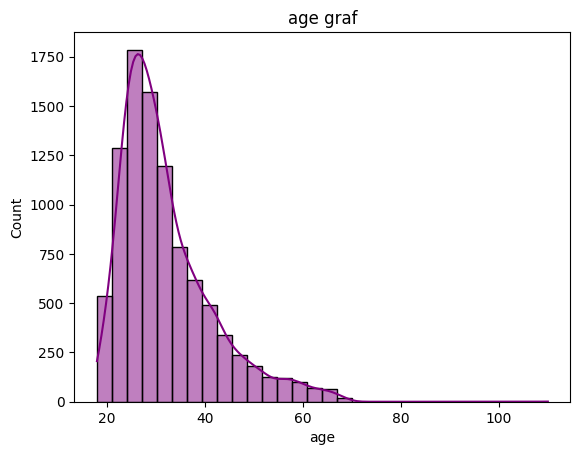

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'], kde=True, bins=30, color='purple')
plt.title('age graf')
plt.show()


In [7]:
# Veri sayımız 60000 den 9514 e düştü 

In [8]:
# gereksiz bağzı stunları kaldırma
df=df.drop(['essay0','essay1','essay2','essay3','essay4','essay5','essay6',
         'essay7','essay8','essay9'],axis=1)

In [9]:
# Sırasi ile boş değerlerimiz
df.isnull().sum()[df.isnull().sum() > 0]

body_type     848
diet         3753
drinks        502
drugs        2299
education    1055
ethnicity     949
job          1331
offspring    5628
pets         3162
religion     3253
sign         1738
smokes        918
speaks          6
dtype: int64

## Filling empty values

In [10]:
df['drugs'].unique()
# Boş değerleri never ile doldur 
df['drugs'] = df['drugs'].fillna('never')
# Map ile karşılık gelen degerleri numaralandır
df['drugs'] = df["drugs"].map({"never":0, "sometimes":1, "often":2})

In [11]:
df['drinks'].unique()
df['drinks'] = df['drinks'].fillna('not at all')
df['drinks'] = df["drinks"].map({"not at all":0, "rarely":1, "socially":2, "often":3, "very often":4, "desperately":5})


In [12]:
# İlk olarak 'education' sütununda belirtilen değerleri değiştir
df['education'].replace({'working': 'student', 
                         'graduated from': 'graduated', 
                         'dropped out': 'dropped'}, inplace=True)

# NaN değerleri 'did not go' olarak doldur
df['education'] = df['education'].fillna('did not go')

# İlk kelimeyi al
df['education'] = df['education'].str.split().str[0]

# Education sütununu belirttiğiniz değerlere göre haritalayın
df['education'] = df['education'].map({'did not go': 0, 
                                       'student': 1, 
                                       'dropped': 2,
                                       'college/university': 3,
                                       'graduated': 4,
                                       'two-year': 5,
                                       'space': 6,
                                       'high': 7,
                                       'ph.d': 8, 
                                       'masters': 9})


In [13]:
df['education'].unique()

array([nan,  4.,  3.,  2.,  5.,  6.,  9.,  7.,  8.])

In [14]:
# NaN olarak kalan değerleri tekrar 'did not go' olarak doldur
df['education'] = df['education'].fillna(0)

In [15]:
df['education'] = df['education'].astype(int)

In [16]:
df['job'] = df['job'].fillna('unemployed')

# Replace işlemi yap, ama unemployed değerini değiştirme
df['job'] = df['job'].replace({ 
    'transportation': 'Other',
    'hospitality / travel': 'Other',
    'student': 'Other',
    'artistic / musical / writer': 'Artistic',
    'computer / hardware / software': 'Technology',
    'banking / financial / real estate': 'Finance',
    'entertainment / media': 'Media',
    'sales / marketing / biz dev': 'Sales',
    'other': 'Other',
    'medicine / health': 'Health',
    'science / tech / engineering': 'Science',
    'executive / management': 'Management',
    'education / academia': 'Education',
    'clerical / administrative': 'Administration',
    'construction / craftsmanship': 'Construction',
    'rather not say': 'Other',
    'political / government': 'Government',
    'law / legal services': 'Law',
    'military': 'Other',
    'retired': 'Other'})

# Importance mapping
degerler = {
    'Other': 13, 
    'Artistic': 12, 
    'Technology': 11, 
    'Finance': 10, 
    'Media': 9, 
    'Sales': 8,
    'Health': 7, 
    'Science': 6, 
    'Management': 5, 
    'Education': 4, 
    'Administration': 3,
    'Construction': 2, 
    'Government': 1, 
    'Law': 0,
    'unemployed': 14  # unemployed için yeni kategori
}

df['job'] = df['job'].map(degerler)


In [17]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,2,0,0,"asian, white",75.0,-1.0,13,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,3,1,0,white,70.0,80000.0,13,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,2,0,4,NaN,68.0,-1.0,14,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,2,0,0,white,71.0,20000.0,13,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,2,0,4,"asian, black, other",66.0,-1.0,12,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [18]:
df['smokes'] = df['smokes'].fillna('no')
df["smokes"] = df["smokes"].map({"no":0, "trying to quit":1, "sometimes":2, "when drinking":3, "yes":4})
df['smokes'].unique()

array([2, 0, 3, 4, 1], dtype=int64)

In [19]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks            0
drugs             0
education         0
ethnicity       949
height            0
income            0
job               0
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes            0
speaks            6
status            0
dtype: int64

In [20]:
df['speaks'].unique()


array(['english', 'english (fluently), spanish (poorly), french (poorly)',
       'english, french, c++', ...,
       'english (fluently), french (okay), spanish (poorly), sign language (poorly)',
       'english (fluently), spanish, swedish',
       'english (fluently), french (okay), swedish (poorly)'],
      dtype=object)

In [21]:
df['speaks']=df['speaks'].astype('category')
df["speaks"]=df['speaks'].apply(lambda x:len(list(x.split(','))))
df['speaks']=df["speaks"].fillna(df['speaks'].median())
df['speaks']=df["speaks"].astype(int)


In [22]:
df['speaks'].unique()


array([1, 3, 2, 4, 5])

Text(0.5, 1.0, ' education and language ')

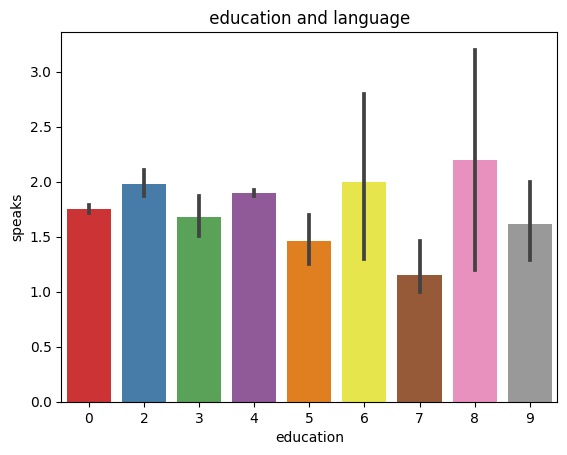

In [23]:
sns.barplot(x=df.education,y=df.speaks, palette='Set1')
plt.title(' education and language ')

In [24]:
df["status"]=df["status"].map({"married":0, "seeing someone":1, "available":2, "single":3})
df['status'].unique()

array([3, 2, 1, 0], dtype=int64)

In [25]:
df['religion'] = df['religion'].fillna('no')
df['pets'] = df['pets'].fillna('no')
df['offspring'] = df['offspring'].fillna('no')
df['ethnicity'] = df['ethnicity'].fillna('no')
df['diet'] = df['diet'].fillna('no')
df['body_type'] = df['body_type'].fillna('rather not say')
df['sign']=df['sign'].fillna('no')

In [26]:
df['income']=df['income'].fillna(0)

In [27]:
df["sex"]=df["sex"].replace({"m":"1","f":"0"})
df['sex'] = df['sex'].astype(int)


In [28]:
# Boş değerleri 'no' ile doldur

# Kategorilere dönüştür
df['diet'] = df['diet'].replace({
    'strictly anything': 'Anything',
    'mostly anything': 'Anything',
    'anything': 'Anything',
    'strictly vegan': 'Vegan',
    'mostly vegan': 'Vegan',
    'vegan': 'Vegan',
    'strictly vegetarian': 'Vegetarian',
    'mostly vegetarian': 'Vegetarian',
    'vegetarian': 'Vegetarian',
    'strictly other': 'Other',
    'mostly other': 'Other',
    'other': 'Other',
    'strictly halal': 'Halal',
    'mostly halal': 'Halal',
    'halal': 'Halal',
    'strictly kosher': 'Kosher',
    'mostly kosher': 'Kosher',
    'kosher': 'Kosher',
    'no': 'No'
})

# Kategorilere numara atama
df['diet'] = df['diet'].map({
    'Anything': 0,
    'Vegan': 1,
    'Vegetarian': 2,
    'Other': 3,
    'Halal': 4,
    'Kosher': 5,
    'No': 6
})

In [29]:
replacement_dict = {
    -1.0e+00: 0,
    8.0e+04: 80000,
    2.0e+04: 20000,
    4.0e+04: 40000,
    3.0e+04: 30000,
    5.0e+04: 50000,
    6.0e+04: 60000,
    1.0e+06: 1000000,
    1.5e+05: 150000,
    1.0e+05: 100000,
    5.0e+05: 500000,
    7.0e+04: 70000,
    2.5e+05: 250000
}

df['income'] = df['income'].replace(replacement_dict)


In [30]:
df.isnull().sum()

age            0
body_type      0
diet           0
drinks         0
drugs          0
education      0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
offspring      0
orientation    0
pets           0
religion       0
sex            0
sign           0
smokes         0
speaks         0
status         0
dtype: int64

In [31]:
df.shape

(9514, 21)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9514 entries, 0 to 9513
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    9514 non-null   object 
 2   diet         9514 non-null   int64  
 3   drinks       9514 non-null   int64  
 4   drugs        9514 non-null   int64  
 5   education    9514 non-null   int32  
 6   ethnicity    9514 non-null   object 
 7   height       9514 non-null   float64
 8   income       9514 non-null   float64
 9   job          9514 non-null   int64  
 10  last_online  9514 non-null   object 
 11  location     9514 non-null   object 
 12  offspring    9514 non-null   object 
 13  orientation  9514 non-null   object 
 14  pets         9514 non-null   object 
 15  religion     9514 non-null   object 
 16  sex          9514 non-null   int32  
 17  sign         9514 non-null   object 
 18  smokes       9514 non-null   int64  
 19  speaks     

In [33]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'offspring',
       'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks',
       'status'],
      dtype='object')

In [34]:
[(i,len(df[i].unique())) for i in df.columns]

[('age', 53),
 ('body_type', 12),
 ('diet', 7),
 ('drinks', 6),
 ('drugs', 3),
 ('education', 9),
 ('ethnicity', 113),
 ('height', 34),
 ('income', 13),
 ('job', 15),
 ('last_online', 6763),
 ('location', 89),
 ('offspring', 16),
 ('orientation', 3),
 ('pets', 16),
 ('religion', 46),
 ('sex', 2),
 ('sign', 49),
 ('smokes', 5),
 ('speaks', 5),
 ('status', 4)]

In [35]:
# Kategorilere dönüştür
df['body_type'] = df['body_type'].map({
    'fit': 'sporty',
    'athletic': 'sporty',
    'thin': 'sporty',
    'skinny': 'sporty',
    'average': 'average',
    'curvy': 'curvy',
    'a little extra': 'curvy',
    'full figured': 'curvy',
    'overweight': 'bad',
    'jacked': 'bad',
    'used up': 'bad',
    'rather not say': 'bad'
})

# Kategorilere numara atama
df['body_type'] = df['body_type'].map({
    'sporty': 0,
    'average': 1,
    'curvy': 2,
    'bad': 3
})


# <font color='blue'>  Can your dating profile predict the generation you belong to? (Millennial, Gen X-er, or Boomers)  According to 2024

Flört profiliniz hangi kuşağa ait olduğunuzu tahmin edebilir mi? 
    
<a herf=https://en.wikipedia.org/wiki/Generation> source </a>
    
ben moder zamana göre yaptım 
    https://en.wikipedia.org/wiki/Generation
    
## Millennials (1981-1996 born):  28-43 age 
    
## Gen X (1965-1980 born):  44-59 age 
    
## Baby Boomers (1946-1964 born):  60-78 age .
    

In [36]:
# Yaş aralıklarına göre nesil gruplarını belirle
df['generation'] = df['age'].map(
    lambda x: 3 if x <= 27 else        # Gen Z
              0 if 28 <= x <= 43 else  # Millennials
              1 if 44 <= x <= 59 else  # Gen X
              2 if 60 <= x <= 78 else  # Baby Boomers
              4                        # kayıp kuşak 
)
# Nesil gruplarını say
m = (df['generation'] == 0).sum()
g = (df['generation'] == 1).sum()
b = (df['generation'] == 2).sum()
z = (df['generation'] == 3).sum()
q = (df['generation'] == 4).sum()


print("Millennial = ", m,"\nGenX_er = ", g,"\nBoomers = ", b,'\nz',z,'\nq',q)

Millennial =  4791 
GenX_er =  933 
Boomers =  182 
z 3607 
q 1


In [37]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,generation
0,22.0,2,0,2,0,0,"asian, white",75.0,0.0,13,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,1,gemini,2,1,3,3
1,35.0,1,3,3,1,0,white,70.0,80000.0,13,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,1,cancer,0,3,3,0
2,38.0,0,0,2,0,4,no,68.0,0.0,14,2012-06-27-09-10,"san francisco, california",no,straight,has cats,no,1,pisces but it doesn&rsquo;t matter,0,3,2,0
3,23.0,0,2,2,0,0,white,71.0,20000.0,13,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,no,1,pisces,0,2,3,3
4,29.0,0,6,2,0,4,"asian, black, other",66.0,0.0,12,2012-06-27-21-26,"san francisco, california",no,straight,likes dogs and likes cats,no,1,aquarius,0,1,3,0


In [38]:
df=df[['age', 'body_type', 'generation', 'diet', 'drinks', 'drugs', 'education', 'height', 'income', 'job',
       'sex', 'smokes', 'status']]
#gereksiz sütunları kaldırdık

In [39]:
df.head()

,age,body_type,generation,diet,drinks,drugs,education,height,income,job,sex,smokes,status
0,22.0,2,3,0,2,0,0,75.0,0.0,13,1,2,3
1,35.0,1,0,3,3,1,0,70.0,80000.0,13,1,0,3
2,38.0,0,0,0,2,0,4,68.0,0.0,14,1,0,2
3,23.0,0,3,2,2,0,0,71.0,20000.0,13,1,0,3
4,29.0,0,0,6,2,0,4,66.0,0.0,12,1,0,3


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9514 entries, 0 to 9513
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         9514 non-null   float64
 1   body_type   9514 non-null   int64  
 2   generation  9514 non-null   int64  
 3   diet        9514 non-null   int64  
 4   drinks      9514 non-null   int64  
 5   drugs       9514 non-null   int64  
 6   education   9514 non-null   int32  
 7   height      9514 non-null   float64
 8   income      9514 non-null   float64
 9   job         9514 non-null   int64  
 10  sex         9514 non-null   int32  
 11  smokes      9514 non-null   int64  
 12  status      9514 non-null   int64  
dtypes: float64(3), int32(2), int64(8)
memory usage: 966.3 KB


# Modeling

Text(0.5, 1.0, ' Corelassion Graf ')

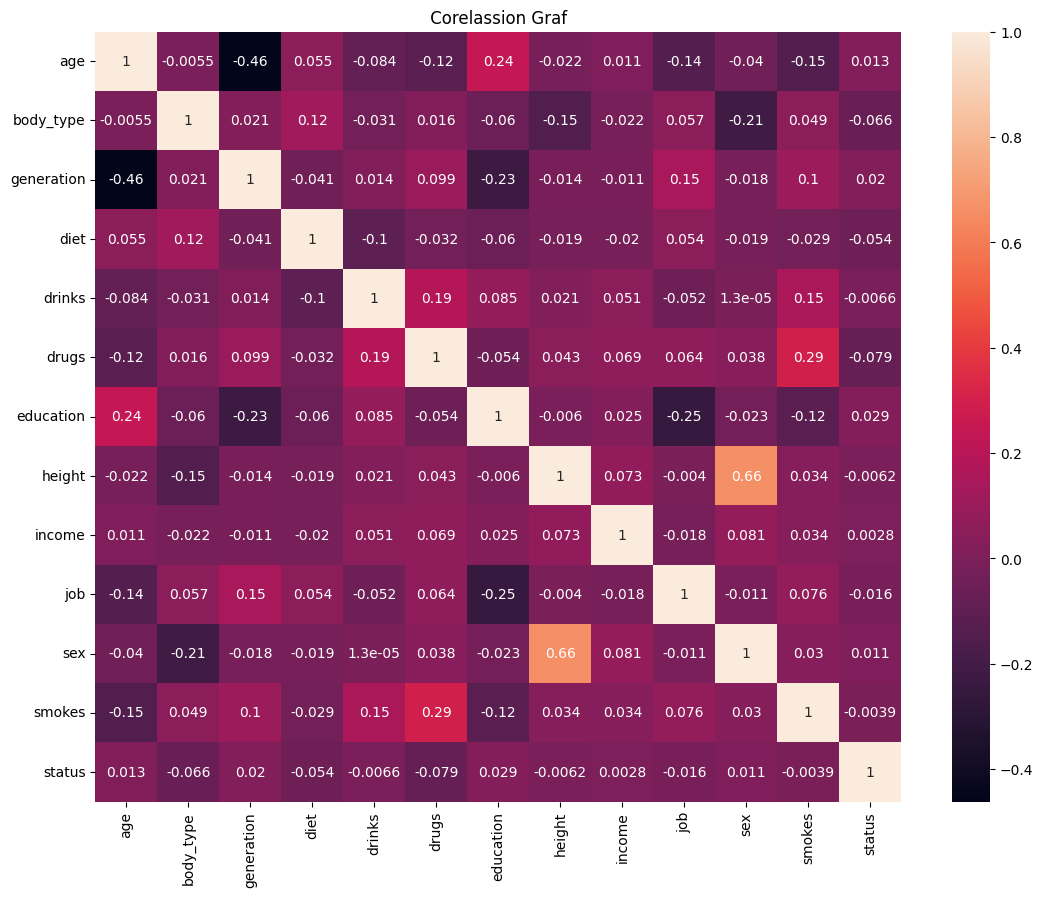

In [41]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title(' Corelassion Graf ')

In [42]:
from regression_function import algo_test 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [43]:
df.columns

Index(['age', 'body_type', 'generation', 'diet', 'drinks', 'drugs',
       'education', 'height', 'income', 'job', 'sex', 'smokes', 'status'],
      dtype='object')

In [44]:
df.shape

(9514, 13)

In [45]:
x = df.drop('age', axis=1)
y = df['age']

In [46]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,8.501921e-01,3.689889e+00,2.948386e+00
KNeighborsRegressor,8.455125e-01,3.747077e+00,3.046274e+00
XGBRegressor,8.397125e-01,3.816768e+00,2.990921e+00
Extra Tree,7.228296e-01,5.019025e+00,3.757802e+00
Decision Tree,7.156977e-01,5.083189e+00,3.824048e+00
AdaBoost,3.470322e-01,7.703567e+00,5.058119e+00
Ridge,2.328092e-01,8.350216e+00,5.617552e+00
Linear,2.328075e-01,8.350225e+00,5.617540e+00
ElasticNet,2.142270e-01,8.450736e+00,5.832313e+00
Lasso,2.125510e-01,8.459744e+00,5.737391e+00


In [47]:
from sklearn.ensemble import GradientBoostingRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modeli eğitme
model.fit(x_train, y_train)

# Tahmin yapma
y_pred = model.predict(x_test)

# Performans değerlendirmesi
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R-squared: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')

R-squared: 0.8502
RMSE: 3.6902
MAE: 2.9486


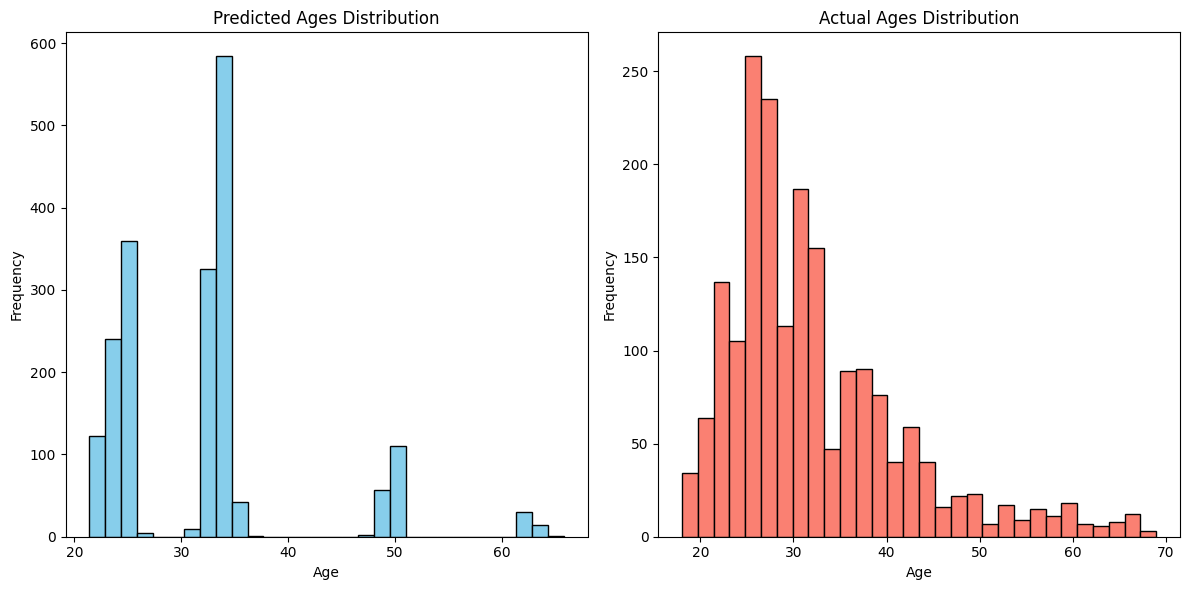

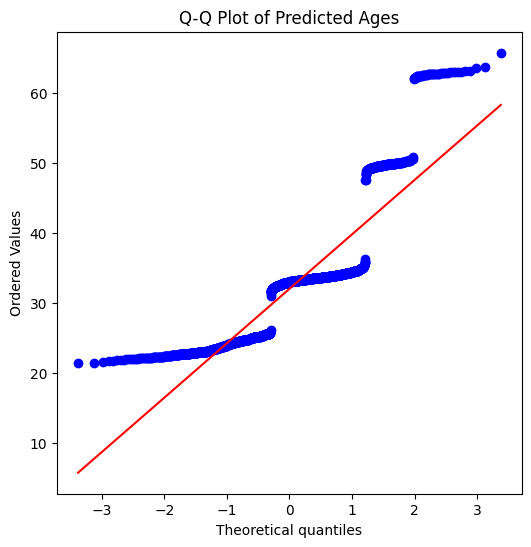

In [48]:
# Histogram ile dağılım
plt.figure(figsize=(12, 6))

# Tahminlerin Histogramı
plt.subplot(1, 2, 1)
plt.hist(y_pred, bins=30, color='skyblue', edgecolor='black')
plt.title('Predicted Ages Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Gerçek Yaşların Histogramı
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, color='salmon', edgecolor='black')
plt.title('Actual Ages Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Q-Q Plot
import scipy.stats as stats

plt.figure(figsize=(6, 6))
stats.probplot(y_pred, dist="norm", plot=plt)
plt.title('Q-Q Plot of Predicted Ages')
plt.show()


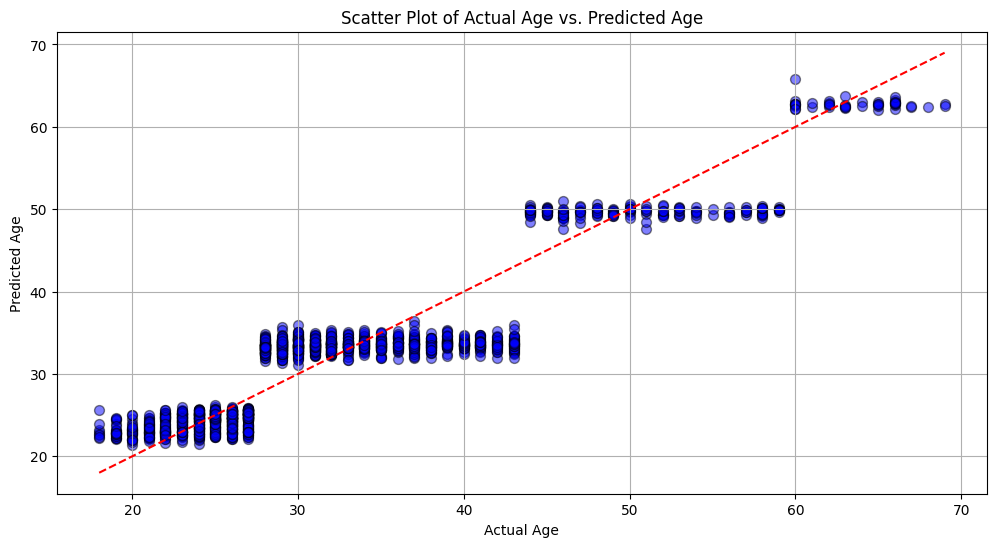

In [49]:
import matplotlib.pyplot as plt

# Gerçek yaş ve tahmin edilen yaş değerlerini scatter plot ile görselleştirme
plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolors='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Scatter Plot of Actual Age vs. Predicted Age')
plt.grid(True)
plt.show()


# Classification 

# Can your dating profile predict the generation you belong to?

### Flört profiliniz hangi kuşağa ait olduğunuzu tahmin edebilir mi?

In [50]:
df.head()

,age,body_type,generation,diet,drinks,drugs,education,height,income,job,sex,smokes,status
0,22.0,2,3,0,2,0,0,75.0,0.0,13,1,2,3
1,35.0,1,0,3,3,1,0,70.0,80000.0,13,1,0,3
2,38.0,0,0,0,2,0,4,68.0,0.0,14,1,0,2
3,23.0,0,3,2,2,0,0,71.0,20000.0,13,1,0,3
4,29.0,0,0,6,2,0,4,66.0,0.0,12,1,0,3


In [51]:
from classification_all_in_one import algo_test as at

x = df.drop('generation', axis=1)
y = df['generation']

at(x,y)

Training models...
BernoulliNB model is being trained...
[[1112    0    0  350]
 [ 206    0    0   49]
 [  60    0    0    6]
 [ 587    0    0  485]]
LogisticRegression model is being trained...
[[1458    0    0    4]
 [ 255    0    0    0]
 [  66    0    0    0]
 [ 415    0    0  657]]
DecisionTreeClassifier model is being trained...
[[1462    0    0    0]
 [   0  255    0    0]
 [   0    0   66    0]
 [   0    0    0 1072]]
RandomForestClassifier model is being trained...
[[1462    0    0    0]
 [   0  255    0    0]
 [   0    4   62    0]
 [   0    0    0 1072]]
GradientBoostingClassifier model is being trained...
[[1462    0    0    0]
 [   0  255    0    0]
 [   0    0   66    0]
 [   0    0    0 1072]]
KNeighborsClassifier model is being trained...
[[1414   10    0   38]
 [  15  237    3    0]
 [   0   13   53    0]
 [  37    0    0 1035]]
AdaBoostClassifier model is being trained...
[[1462    0    0    0]
 [ 255    0    0    0]
 [  66    0    0    0]
 [   0    0    0 1072]]
Mult

,Accuracy,Precision,Recall,F1
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier,0.998599,0.998599,0.998599,0.998599
KNeighborsClassifier,0.959370,0.959370,0.959370,0.959370
AdaBoostClassifier,0.887566,0.887566,0.887566,0.887566
LogisticRegression,0.740806,0.740806,0.740806,0.740806
BernoulliNB,0.559370,0.559370,0.559370,0.559370
MultinomialNB,0.079159,0.079159,0.079159,0.079159


In [52]:
at(x,y)

Training models...
BernoulliNB model is being trained...
[[1112    0    0  350]
 [ 206    0    0   49]
 [  60    0    0    6]
 [ 587    0    0  485]]
LogisticRegression model is being trained...
[[1458    0    0    4]
 [ 255    0    0    0]
 [  66    0    0    0]
 [ 415    0    0  657]]
DecisionTreeClassifier model is being trained...
[[1462    0    0    0]
 [   0  255    0    0]
 [   0    0   66    0]
 [   0    0    0 1072]]
RandomForestClassifier model is being trained...
[[1462    0    0    0]
 [   0  255    0    0]
 [   0    5   61    0]
 [   0    0    0 1072]]
GradientBoostingClassifier model is being trained...
[[1462    0    0    0]
 [   0  255    0    0]
 [   0    0   66    0]
 [   0    0    0 1072]]
KNeighborsClassifier model is being trained...
[[1414   10    0   38]
 [  15  237    3    0]
 [   0   13   53    0]
 [  37    0    0 1035]]
AdaBoostClassifier model is being trained...
[[1462    0    0    0]
 [ 255    0    0    0]
 [  66    0    0    0]
 [   0    0    0 1072]]
Mult

,Accuracy,Precision,Recall,F1
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier,0.998249,0.998249,0.998249,0.998249
KNeighborsClassifier,0.959370,0.959370,0.959370,0.959370
AdaBoostClassifier,0.887566,0.887566,0.887566,0.887566
LogisticRegression,0.740806,0.740806,0.740806,0.740806
BernoulliNB,0.559370,0.559370,0.559370,0.559370
MultinomialNB,0.079159,0.079159,0.079159,0.079159


Training models...
Training completed.
Best performing model: DecisionTreeClassifier
Confusion Matrix:
[[1462    0    0    0]
 [   0  255    0    0]
 [   0    0   66    0]
 [   0    0    0 1072]]


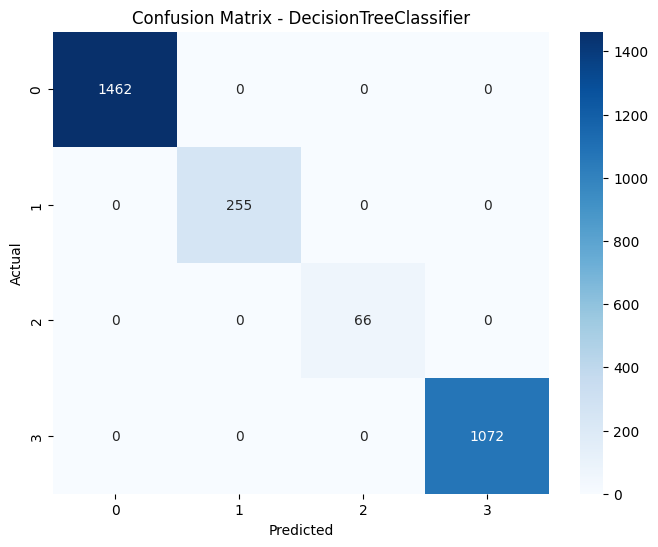

Other Models:


,Accuracy,Precision,Recall,F1
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier,0.998949,0.998949,0.998949,0.998949
KNeighborsClassifier,0.959370,0.959370,0.959370,0.959370
AdaBoostClassifier,0.887566,0.887566,0.887566,0.887566
LogisticRegression,0.740806,0.740806,0.740806,0.740806
BernoulliNB,0.559370,0.559370,0.559370,0.559370
MultinomialNB,0.079159,0.079159,0.079159,0.079159


In [53]:
from classification import algo_test as cat
cat(x,y)

In [54]:
from sklearn.preprocessing import StandardScaler

    # Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
# KNN modelini oluşturma ve eğitme
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors parametresi, komşu sayısını belirler
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1462
           1       0.80      0.69      0.74       255
           2       0.89      0.50      0.64        66
           3       0.80      0.82      0.81      1072

    accuracy                           0.81      2855
   macro avg       0.83      0.71      0.76      2855
weighted avg       0.81      0.81      0.81      2855



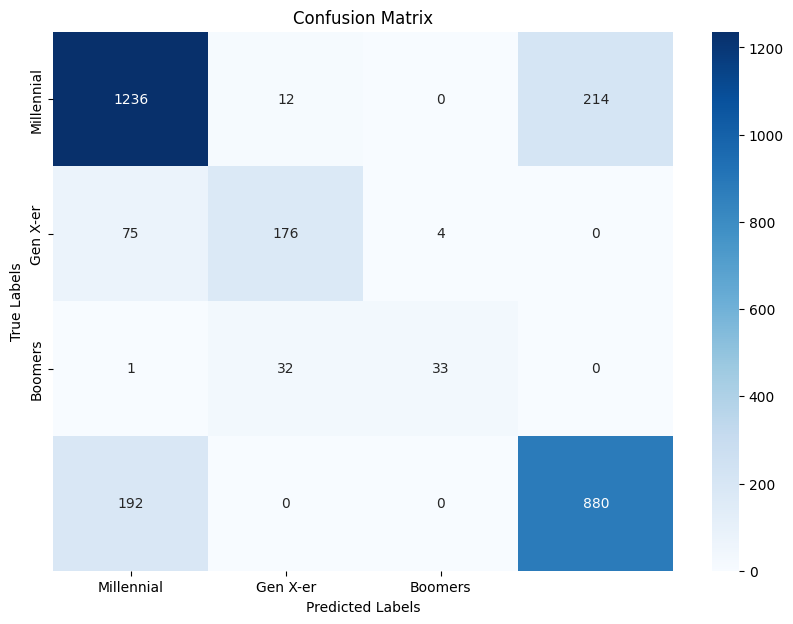

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sınıflandırma raporu
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Karışıklık Matrisini Oluşturma
conf_matrix = confusion_matrix(y_test, y_pred)

# Karışıklık Matrisini Görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Millennial', 'Gen X-er', 'Boomers'], yticklabels=['Millennial', 'Gen X-er', 'Boomers'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#### Güzel bir sonuç aldık  😊

# Deep Learning

## Classificaton For Generation 

In [56]:
df.generation.unique()

array([3, 0, 1, 2, 4], dtype=int64)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Özellikler ve hedef değişken
X=df.drop('generation',axis=1)
y = df['generation']

# Özelliklerin ve hedef değişkenlerin sayısal formata dönüştürülmesi
X = pd.get_dummies(X)  # Kategorik değişkenleri sayısal hale getirme
y = to_categorical(y, num_classes=5)  # Sınıf etiketlerini one-hot encode yapma

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model oluşturma
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')  # 5 sınıf için çıkış katmanı
])

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_split=0.2, verbose=1)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3090 - loss: 1.6708 - val_accuracy: 0.6787 - val_loss: 0.9034
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7016 - loss: 0.8175 - val_accuracy: 0.7980 - val_loss: 0.5994
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8181 - loss: 0.5603 - val_accuracy: 0.8844 - val_loss: 0.4370
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8884 - loss: 0.4102 - val_accuracy: 0.9197 - val_loss: 0.3343
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9132 - loss: 0.3229 - val_accuracy: 0.9272 - val_loss: 0.2670
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9291 - loss: 0.2485 - val_accuracy: 0.9332 - val_loss: 0.2283
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9445 - loss: 0.2132 - val_accuracy: 0.9362 - val_loss: 0.1993
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9468 - loss: 0.1857 - val_accuracy: 0.9474 - val_loss

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1462
           1       0.92      0.89      0.90       255
           2       0.82      0.85      0.84        66
           3       1.00      0.99      0.99      1072

    accuracy                           0.98      2855
   macro avg       0.93      0.93      0.93      2855
weighted avg       0.98      0.98      0.98      2855



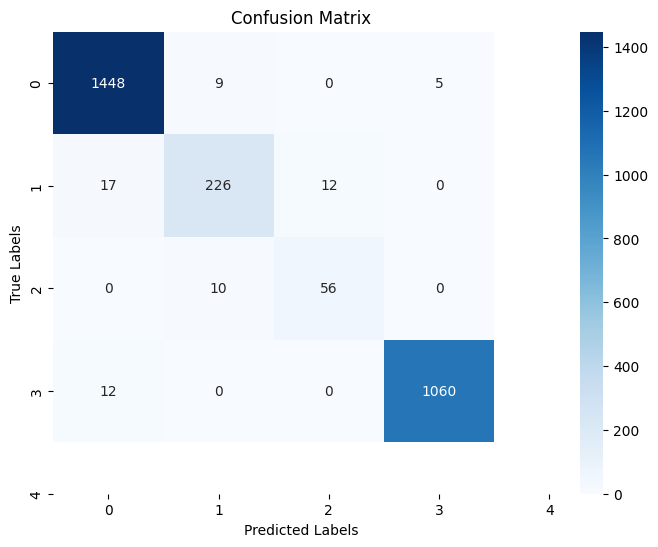

In [58]:
# Test seti üzerinde tahminler yapma
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # En yüksek olasılığa sahip sınıfı seçme
y_test_classes = np.argmax(y_test, axis=1)

# Sonuçları değerlendirme
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sınıflandırma raporu
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Karışıklık Matrisini Oluşturma
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Karışıklık Matrisini Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Regression For Age

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Özellikler ve hedef değişken
X=df.drop('age',axis=1)
y = df['age'].values

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])



model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.2, verbose=0)

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error: 40.39
Mean Absolute Error: 4.23


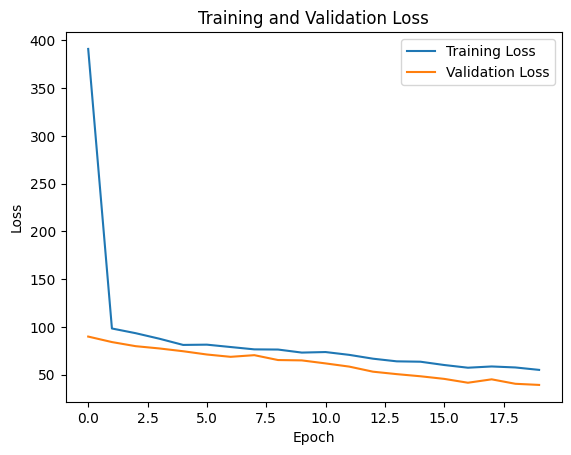

In [61]:

# Tahmin yapma
y_pred = model.predict(X_test)

# Değerlendirme
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Eğitim sürecini görselleştirme
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


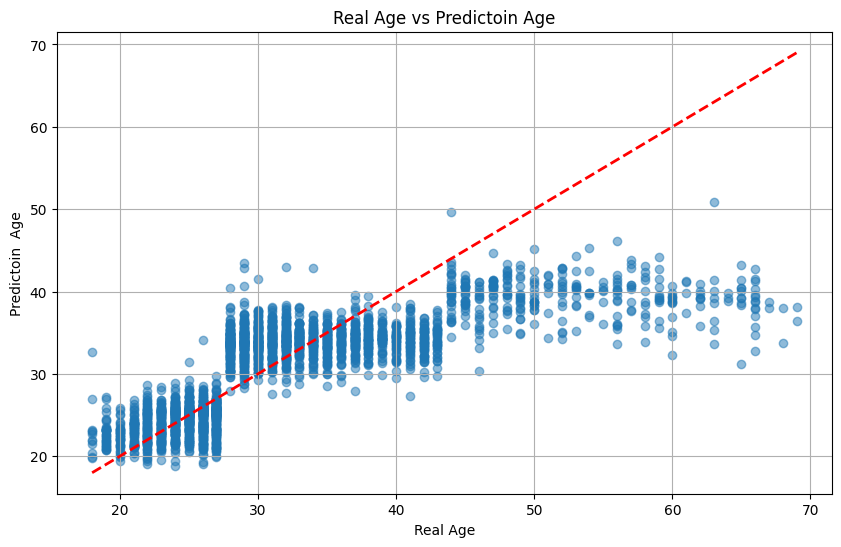

In [62]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).flatten()  # Tahminleri 1D dizisine düzleştirin


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # y = x çizgisi
plt.xlabel('Real Age')
plt.ylabel('Predictoin  Age')
plt.title('Real Age vs Predictoin Age')
plt.grid(True)
plt.show()


# <font color='red'> Predicting the incoming value from Difference 
##  DIşardan Gelen değeri tahmin etme 

In [63]:
df.sample(5)

,age,body_type,generation,diet,drinks,drugs,education,height,income,job,sex,smokes,status
7649,30.0,0,0,0,2,0,2,68.0,0.0,6,1,0,3
2334,35.0,1,0,0,2,0,0,74.0,50000.0,11,1,0,3
3225,46.0,0,1,0,2,0,4,66.0,0.0,9,0,0,3
1205,37.0,0,0,6,2,0,0,72.0,0.0,12,1,0,3
5172,21.0,0,3,0,3,1,5,62.0,0.0,8,0,4,3


In [64]:
from sklearn.ensemble import GradientBoostingRegressor
x = df.drop('age', axis=1)
y = df['age']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modeli eğitme
model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [65]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Eğitim verileri ile fit etme
scaler = StandardScaler()
scaler.fit(X_train)  # X_train eğitim verilerinizi temsil eder

# Yeni veri hazırlama
new_data = np.array([
    [
        0,  # body_type
        1,  # generation
        2,  # diet
        1,  # drinks
        0,  # drugs
        2,  # education
        76, # height
        50000, # income
        1,  # job
        0,  # sex
        0,  # smokes
        1]  # status
]).astype(float)

# Yeni veriyi ölçeklendirme
new_data_scaled = scaler.transform(new_data)

# Tahmin yapma
age_prediction = model.predict(new_data_scaled)
print("prediction  age :", age_prediction)


prediction  age : [50.25464056]


### 🚀 Sonuç

Analiz, kullanıcı yaşını ve jenerasyonunu makine öğrenimi modelleri kullanarak başarılı bir şekilde tahmin etti. Ana bulgular şunlardır:

- **Yaş Tahmini**: Regresyon modelleri, Gradient Boosting ve KNeighborsRegressor gibi yöntemlerle çeşitli doğruluk seviyeleri sundu.
- **Jenerasyon Tahmini**: Sınıflandırma modelleri, KNeighborsClassifier ve Derin Öğrenme yaklaşımları ile kullanıcıları doğru bir şekilde jenerasyonlarına ayırdı.

Genel olarak, modeller iyi performans gösterdi ve kullanıcı demografisi hakkında uygulanabilir içgörüler sağladı. Gelecekte, modellerin optimizasyonu ve ek özelliklerin dahil edilmesi ile tahminlerin geliştirilmesi önerilmektedir.


# 🚀 Conclusion

The analysis effectively predicted user age and generation using machine learning models. Key findings include:

- **Age Prediction**: Regression models demonstrated varying degrees of accuracy, with Gradient Boosting and KNeighborsRegressor providing valuable insights.
- **Generation Prediction**: Classification models, including KNeighborsClassifier and Deep Learning approaches, accurately classified users into their respective generations.

Overall, the models performed well, offering actionable insights into user demographics. Future improvements may focus on optimizing models and incorporating additional features for enhanced predictions.
